In [1]:
from google.colab import drive
import pandas as pd

# Google Drive
drive.mount('/content/drive')

# CSV
file_path = '/content/drive/My Drive/MA/20240517 OpenNEM.csv'
data = pd.read_csv(file_path)

#
data.head()

Mounted at /content/drive


,date,Battery (Charging) - MW,Pumps - MW,Coal (Brown) - MW,Coal (Black) - MW,Bioenergy (Biogas) - MW,Bioenergy (Biomass) - MW,Distillate - MW,Gas (Steam) - MW,Gas (CCGT) - MW,...,Bioenergy (Biogas) Emissions Vol - tCO₂e,Bioenergy (Biomass) Emissions Vol - tCO₂e,Distillate Emissions Vol - tCO₂e,Gas (Steam) Emissions Vol - tCO₂e,Gas (CCGT) Emissions Vol - tCO₂e,Gas (OCGT) Emissions Vol - tCO₂e,Gas (Reciprocating) Emissions Vol - tCO₂e,Gas (Waste Coal Mine) Emissions Vol - tCO₂e,Emissions Intensity - kgCO₂e/MWh,Price - AUD/MWh
0,2024-05-17 07:10,-1.03,0.0,4100.0,12027.0,28.02,24.1,-0.1,82.0,1057.0,...,0.04,0.36,0.0,4.84,61.89,52.35,12.69,4.02,709.84,140.4
1,2024-05-17 07:15,-1.11,0.0,4099.0,12006.0,29.50,24.4,-0.1,98.0,1013.0,...,0.04,0.36,0.0,5.79,60.12,51.44,12.73,4.02,702.26,132.9
2,2024-05-17 07:20,-0.38,0.0,4103.0,12043.0,31.31,24.4,-0.1,99.0,989.2,...,0.05,0.36,0.0,5.85,57.77,50.10,12.65,4.02,697.14,130.0
3,2024-05-17 07:25,-0.33,0.0,4115.0,11907.0,30.96,24.6,-0.1,102.0,951.0,...,0.05,0.37,0.0,6.02,54.09,50.43,12.75,4.01,684.44,142.2
4,2024-05-17 07:30,-0.48,0.0,4108.0,11804.0,30.94,24.7,-0.1,109.0,985.2,...,0.05,0.37,0.0,6.44,55.43,54.13,12.74,4.00,678.35,141.7


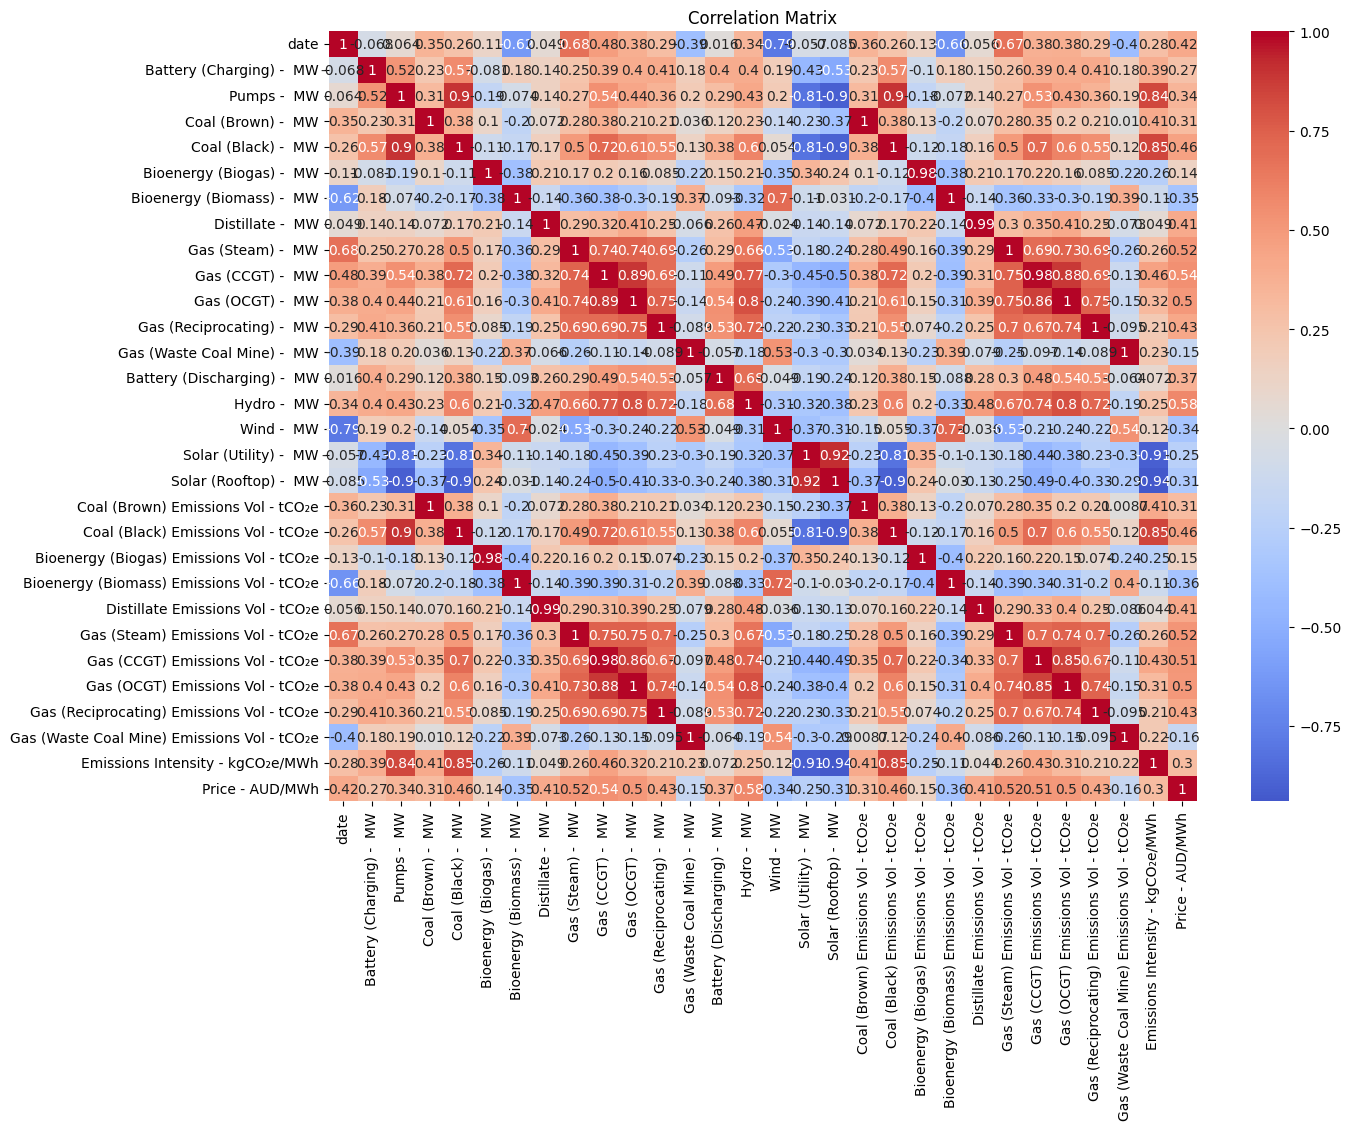

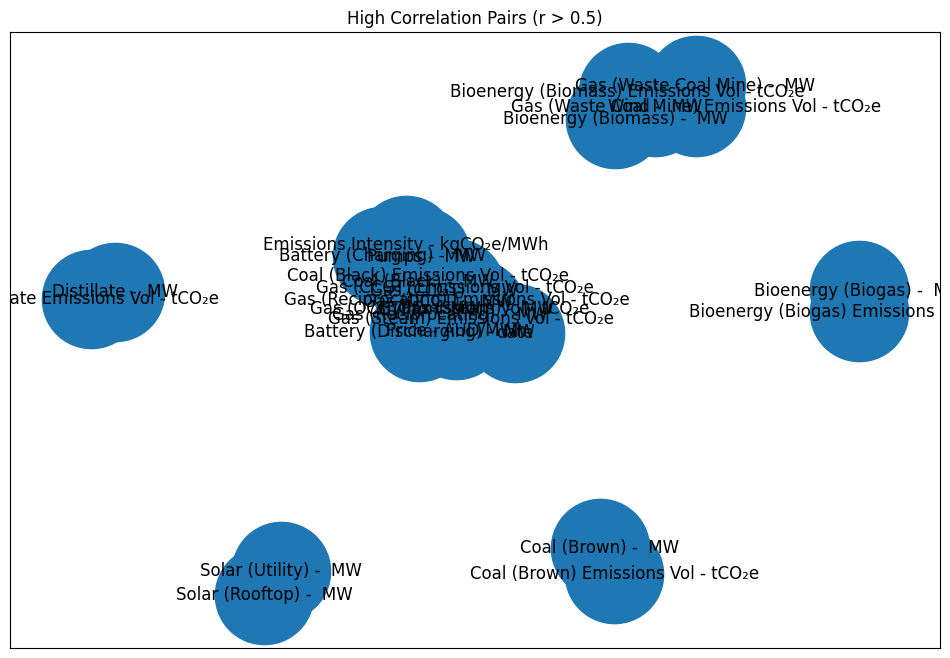

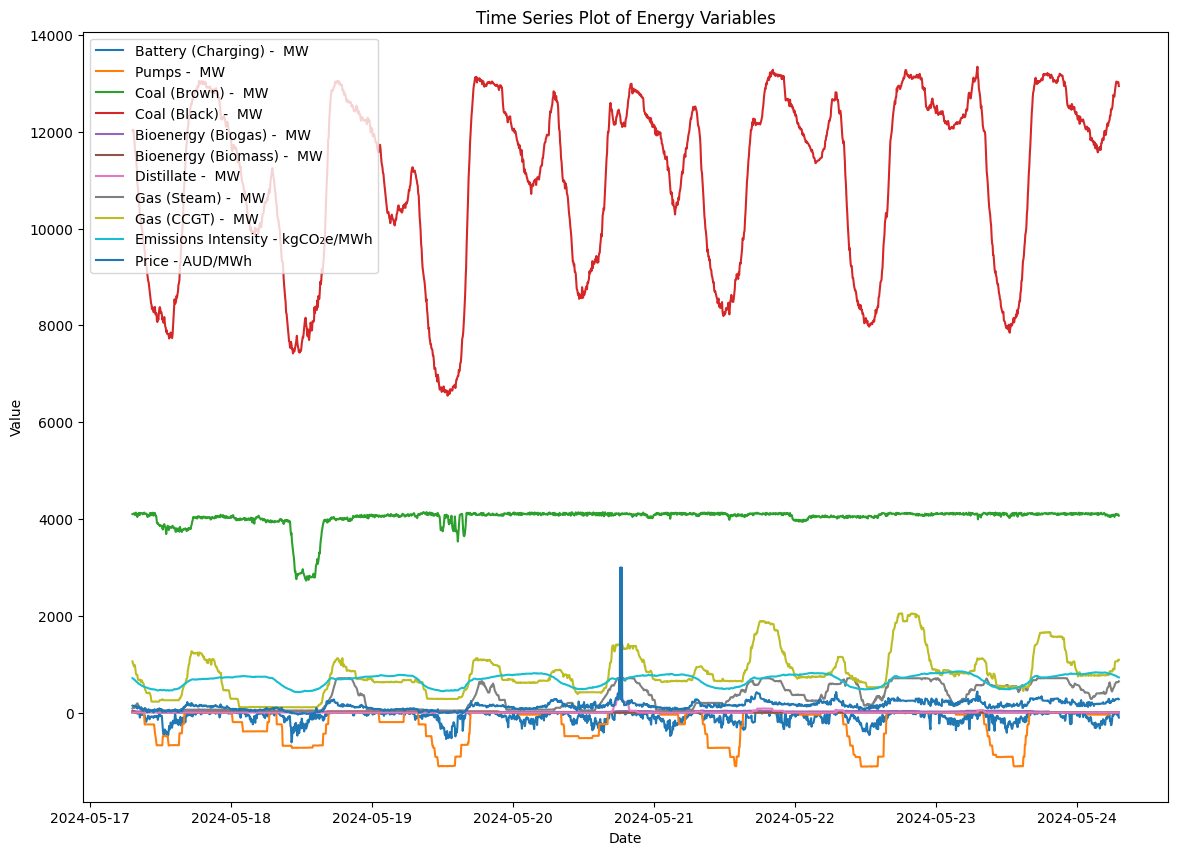

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
#file_path = '/mnt/data/20240517 OpenNEM.csv'
#data = pd.read_csv(file_path)

# 转换日期列为datetime类型
data['date'] = pd.to_datetime(data['date'])

# 计算相关系数矩阵
corr_matrix = data.corr()

# 绘制相关系数矩阵热图
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 提取相关系数大于0.5的变量对
high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.5]

# 绘制多维点线图
import networkx as nx

G = nx.Graph()

# 添加节点
for var in high_corr_pairs['Variable 1'].unique():
    G.add_node(var)

# 添加边
for _, row in high_corr_pairs.iterrows():
    G.add_edge(row['Variable 1'], row['Variable 2'], weight=row['Correlation'])

pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_size=5000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(row['Variable 1'], row['Variable 2']): f"{row['Correlation']:.2f}" for _, row in high_corr_pairs.iterrows()})
plt.title('High Correlation Pairs (r > 0.5)')
plt.show()

# 绘制时间序列图
variables_to_plot = ['Battery (Charging) -  MW', 'Pumps -  MW', 'Coal (Brown) -  MW', 'Coal (Black) -  MW',
                     'Bioenergy (Biogas) -  MW', 'Bioenergy (Biomass) -  MW', 'Distillate -  MW', 'Gas (Steam) -  MW',
                     'Gas (CCGT) -  MW', 'Emissions Intensity - kgCO₂e/MWh', 'Price - AUD/MWh']

plt.figure(figsize=(14, 10))
for var in variables_to_plot:
    plt.plot(data['date'], data[var], label=var)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot of Energy Variables')
plt.legend()
plt.show()
